Solaris installation with gdal\
!add-apt-repository ppa:ubuntugis/ppa -y\
!apt-get update\
!apt-get install python-numpy gdal-bin libgdal-dev python3-rtree\

!pip install solaris==0.2.0

In [1]:
!pip3 install torch torchvision

In [ ]:
!pip3 install py7zr

In [ ]:
!pip3 install rasterio

Solaris installation

In [ ]:
!add-apt-repository ppa:ubuntugis/ppa -y
!apt-get update
!apt-get install python-numpy gdal-bin libgdal-dev python3-rtree\

!pip install solaris==0.2.0

In [24]:
import torch
import rasterio
import py7zr
import os
import numpy as np
import pandas as pd
import solaris as sol
import geopandas as gpd
import matplotlib.pyplot as plt
from PIL import Image
from torch import nn
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

load dataset from github\
repo path : https://github.com/AnupamaRajkumar/LandfillDataset.git


In [7]:
#!apt-get update && apt-get upgrade
#!apt-get install git-lfs

Use this if downloading from git (ie. LFS quota available!)

In [8]:
#!git lfs clone https://github.com/AnupamaRajkumar/LandfillDataset.git

Extract the imaages from zip folder

In [9]:
def ExtractFiles(in_path, out_path):
  with py7zr.SevenZipFile(in_path, mode='r') as z:
    z.extractall(out_path)

Use following functions downloading dataset from dropbox

Multispectral dataset

In [10]:
def DownloadMultiSpectralDataset():
  !wget https://www.dropbox.com/s/go95ez8lez9113y/MultiSpectral.7z?dl=0
  os.rename('MultiSpectral.7z?dl=0', 'Multispectral.7z')
  ExtractFiles('Multispectral.7z', './')

Pansharpened dataset

In [11]:
def DownloadPanSharpenedDataset():
  !wget https://www.dropbox.com/s/qb0dfxjafuodc27/Pansharpened.7z?dl=0
  os.rename('Pansharpened.7z?dl=0', 'Pansharpened.7z')
  ExtractFiles('Pansharpened.7z', './')


In [12]:
DownloadMultiSpectralDataset()

--2021-04-05 11:02:41--  https://www.dropbox.com/s/go95ez8lez9113y/MultiSpectral.7z?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/go95ez8lez9113y/MultiSpectral.7z [following]
--2021-04-05 11:02:42--  https://www.dropbox.com/s/raw/go95ez8lez9113y/MultiSpectral.7z
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5c9c4941f0f7679727cd7d596.dl.dropboxusercontent.com/cd/0/inline/BMDHEGAeHWDG2MM6a-78zMz-6HEXA1GzCvJN7t4y1TQTVDMeEghVG4hYfK4eFLWFgqyfwwy1poYMl-0Kz6pmqaxjPlhkC7sM6EoJO4xeDNKP1b8jGpUlaWljpCEvmzpE9hfPTaosGB1IsN0L2hzmhcjA/file# [following]
--2021-04-05 11:02:42--  https://ucf5c9c4941f0f7679727cd7d596.dl.dropboxusercontent.com/cd/0/inline/BMDHEGAeHWDG2MM6a-78zMz-6HEXA1GzCvJN7t4y1TQTVDMeEghVG4hYfK4eFLWFgqyfwwy1p

Declaring paths

In [13]:

#All the paths related to multispectral dataset
Multispectral_path = './Multispectral.7z'                                       #path of zip files
TIF_file_path = './MultiSpectral/HR_TIF_Files.7z'
JSON_file_path = './MultiSpectral/LandfillCoordPolygons.7z'
json_path = './LandfillCoordPolygons'
train_path = './HR_TIF_Files'
train_labels = './MultiSpectral/MultiSpectralData.csv'

#All the paths related to pansharpened datset
Pansharpened_path = './Pansharpened.7z'
PanSharpened_TIF_file_path = './Pansharpened/HR_TIF_Files.7z'

#Output directory path
out_path = './'                                                                 #output path of extracted files

#dimensions of the figure to be displayed
width = 15
height = 15

Extracting the multispectral dataset\
Run this cell if working with multispectral dataset

In [14]:
#extract multispectral images
ExtractFiles(TIF_file_path , out_path)
#extract multispectral json files
ExtractFiles(JSON_file_path , out_path)

Extracting the pansharpened dataset\
Run this cell if working with pansharpened dataset

In [ ]:
 """ 
  #extract pansharpened images
  ExtractFiles(PanSharpened_TIF_file_path , out_path)
  #extract multispectral json files
  #ExtractFiles(JSON_file_path , out_path)
"""

Displaying a few images from the folder

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of training images: 146
-------------multispectral images----------------
(490, 512)
image :  00035_Erd_Hungary.tif channels : 8
(512, 512)
image :  00072_Hannover_Germany.tif channels : 8
(512, 512)
image :  00051_Ersci_Hungary.tif channels : 8
(512, 512)
image :  00124_Tatabanya_Hungary.tif channels : 8
(512, 512)
image :  00026_Erd_Hungary.tif channels : 8
(512, 512)
image :  00024_Erd_Hungary.tif channels : 8


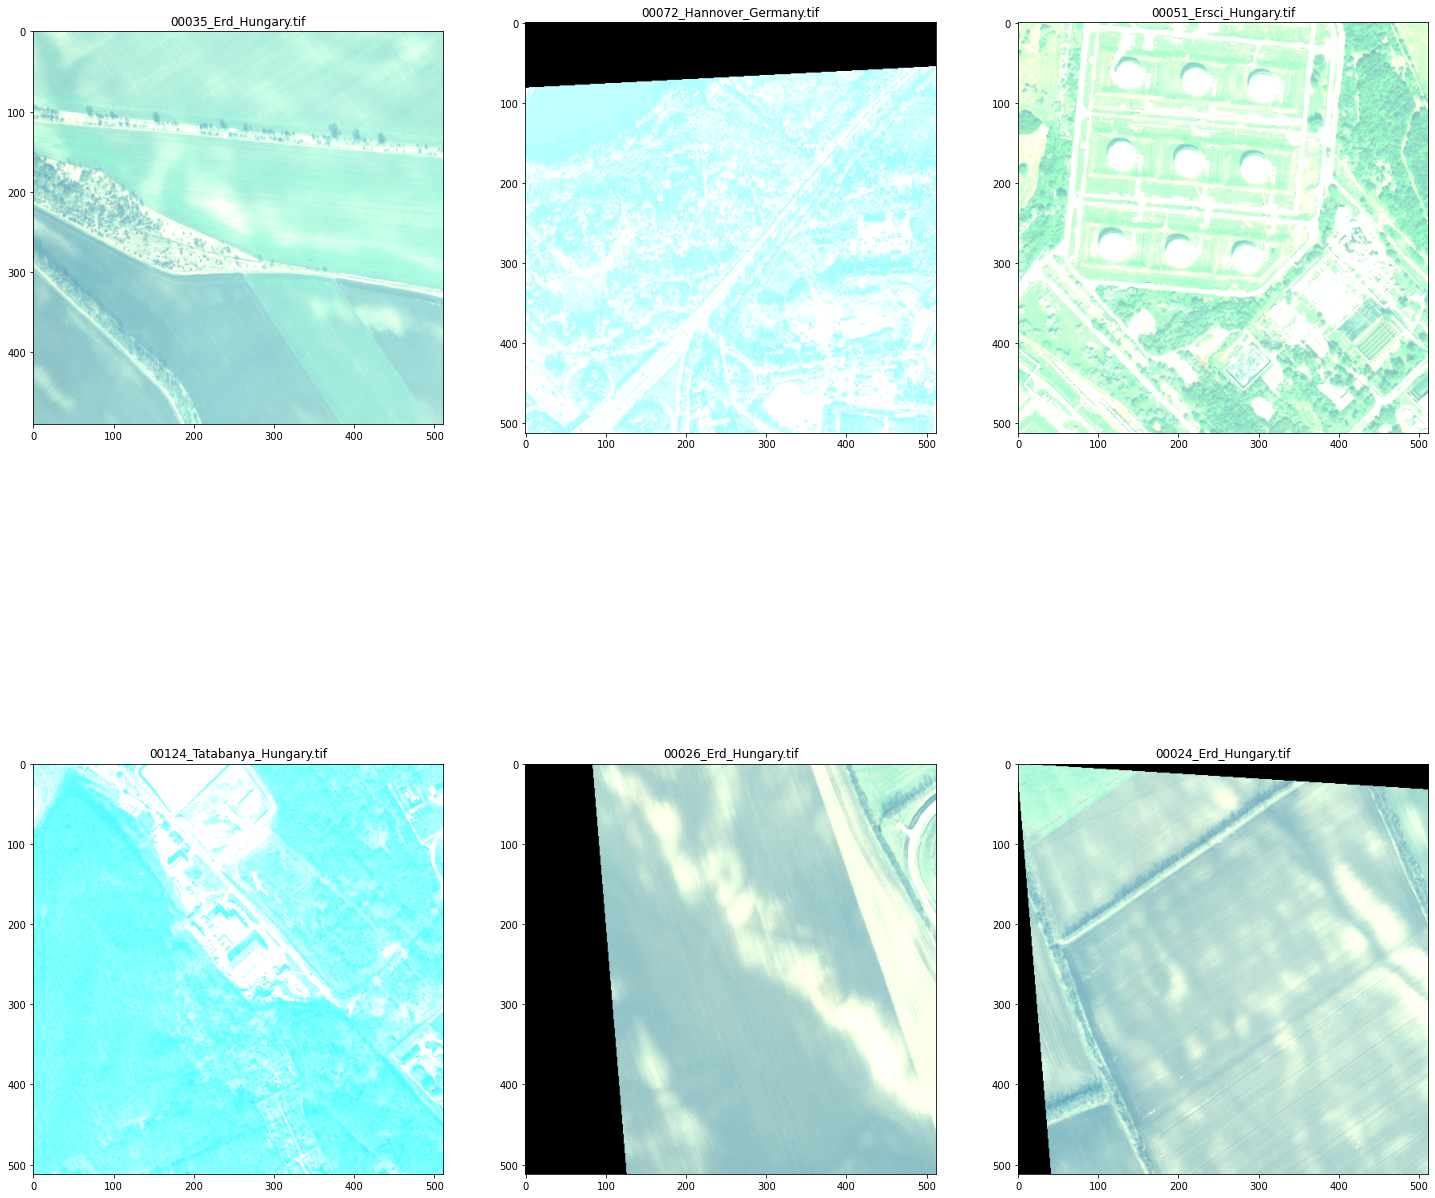

In [16]:
train_files = os.listdir(train_path)

num_of_train_images = len([name for name in train_files if os.path.isfile(os.path.join(train_path, name))])
print("Number of training images:", num_of_train_images)
selected = np.random.choice(num_of_train_images, 6)

fig = plt.figure(figsize = (25,25))
print('-------------multispectral images----------------')

for i, ind in enumerate(selected):
  raster = rasterio.open(os.path.join(train_path, train_files[ind]))
  print(raster.shape)
  raster_arr = raster.read()
  channels = raster_arr.shape[0]
  print("image : " , train_files[ind], "channels :", channels)
  #false color composite visualisation
  if(channels == 8):
    raster_fcc=np.dstack((raster_arr[4,:,:], raster_arr[2,:,:],raster_arr[1,:,:]))  
  elif(channels == 4):
    raster_fcc=np.dstack((raster_arr[2,:,:], raster_arr[1,:,:],raster_arr[0,:,:]))

  plt.subplot(2, 3, i+1)
  plt.imshow(raster_fcc)
  plt.title(train_files[ind])

Performing test-train-val split\
75-15-10 split into test train and validation datasets

Loading a dataset in COCO format

referred from:\
https://github.com/tkshnkmr/frcnn_medium_sample,
https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [17]:
from rasterio.plot import reshape_as_raster, reshape_as_image

class CustomLandfillDataset(torch.utils.data.Dataset):
  def __init__(self, data, csv_file, transforms=None):
    name = pd.read_csv(csv_file, usecols=["Image Index"])
    self.data = name.values.tolist()
    self.transforms = transforms
    ids = pd.read_csv(csv_file, usecols=["Idx"])
    self.ids = ids.values.tolist()

  def __len__(self):
    return len(self.ids)

  def __getitem__(self, index):
    #image id
    img_id = self.ids[index]
    #path for image
    img_name = self.data[index]
    #read the image to extract number of channels
    raster_img = rasterio.open(os.path.join(train_path, img_name[0])).read()
    raster_channels = raster_img.shape[0]
    #image details
    img_info = {}
    img_info["image_id"] = img_id[0]
    img_info["image_name"] = img_name[0]
    img_info["raster_channels"] = raster_channels
    #print(img_info)

    return img_info

In [18]:
#parameters
batch_size = 6
num_workers = 1

In [19]:
train_dataset = CustomLandfillDataset(data=train_path, csv_file=train_labels, transforms=None)

#data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           num_workers=num_workers,
                                           shuffle=True)

print("length of training dataset:", len(train_dataset))
print("length of training loader:", len(train_loader))

length of training dataset: 145
length of training loader: 25


Checking out some images and their corresponding masks

In [20]:
def im_convert(image_name, channels):
  image = rasterio.open(os.path.join(train_path, image_name)).read()
  #false color composite visualisation
  if(channels == 8):
    raster = np.dstack((image[4,:,:], image[2,:,:],image[1,:,:])) 
  elif(channels == 4):
    raster = np.dstack((image[2,:,:], image[1,:,:],image[0,:,:]))
  return raster

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


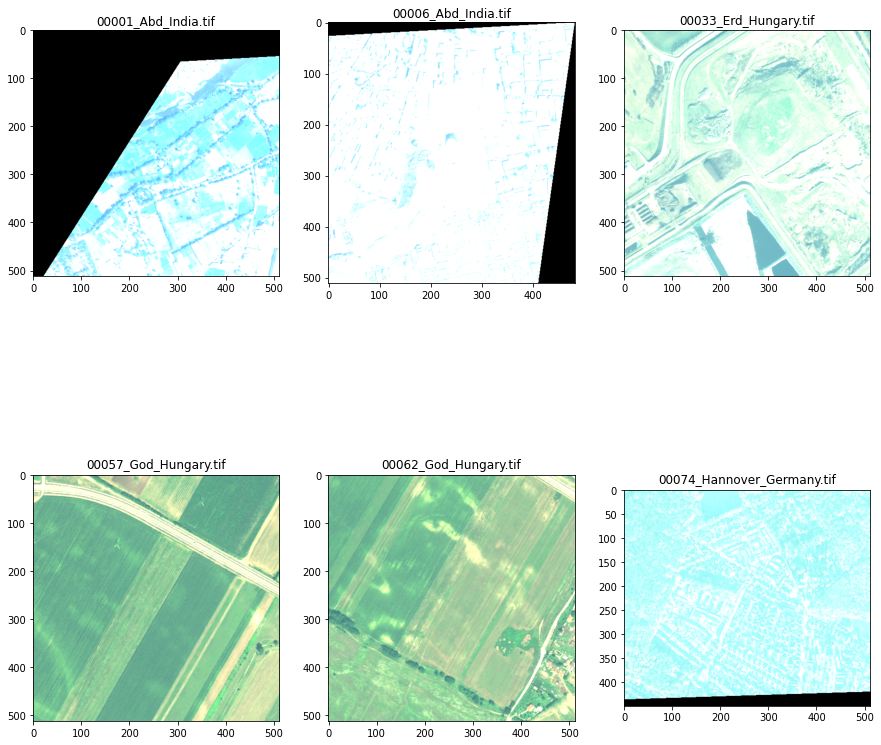

In [21]:
fig = plt.figure(figsize=(width, height))

img_info= next(iter(train_loader))
#print(img_info)

for idx in np.arange(batch_size):
  plt.subplot(2, 3, idx+1)
  id = img_info["image_id"][idx].item()
  name = img_info["image_name"][idx]
  channels = img_info["raster_channels"][idx].item()                         
  plt.imshow(im_convert(name, channels))
  plt.title(name)


Draw polygon on image:


In [22]:
json_frame = pd.read_csv(train_labels, usecols=["json index"])
json_list = json_frame.values.tolist()

for idx in np.arange(batch_size):
  id = img_info["image_id"][idx].item()
  json_name = json_list[id-1][0]
  print(json_name)
  gdf = gpd.read_file(os.path.join(json_path, json_name))
  print(gdf)

NoObj_Abd.json
Empty GeoDataFrame
Columns: [geometry]
Index: []
00006_Abd_India.json
                                            geometry
0  POLYGON ((250602.732 2543410.801, 250604.529 2...
1  POLYGON ((250869.516 2543731.480, 250922.513 2...
00033_Erd_Hungary.json
                                            geometry
0  POLYGON ((333717.263 5249392.260, 333715.545 5...
1  POLYGON ((333718.408 5249431.765, 333716.690 5...
2  POLYGON ((333860.398 5249665.361, 333869.558 5...
3  POLYGON ((334063.076 5249945.332, 334100.291 5...
4  POLYGON ((333992.654 5249833.687, 334068.802 5...
5  POLYGON ((334197.050 5249387.107, 334040.175 5...
6  POLYGON ((334265.755 5249758.684, 334130.063 5...
NoObj_God.json
Empty GeoDataFrame
Columns: [geometry]
Index: []
NoObj_God.json
Empty GeoDataFrame
Columns: [geometry]
Index: []
NoObj_Hannover.json
Empty GeoDataFrame
Columns: [geometry]
Index: []


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
(512, 512)
1
(512, 483)
1
(512, 512)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
(512, 512)
0
(512, 512)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
(449, 512)


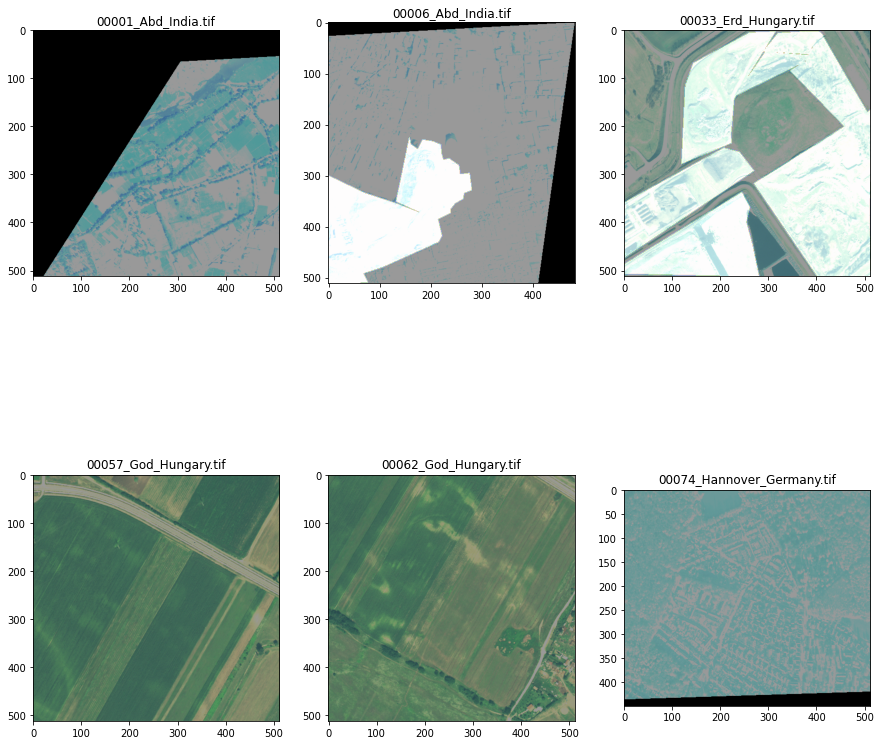

In [23]:
fig = plt.figure(figsize=(width, height))
isLandfillList = pd.read_csv(train_labels, usecols=["IsLandfill"]).values.tolist()


for idx in np.arange(batch_size):
  plt.subplot(2, 3, idx+1)
  id = img_info["image_id"][idx].item()
  json_name = json_list[id-1][0]
  name = img_info["image_name"][idx]
  channels = img_info["raster_channels"][idx].item()  
  image = im_convert(name, channels)
  IsLandfill = isLandfillList[id-1][0]
  print(IsLandfill)
  if(IsLandfill):
    fp_mask = sol.vector.mask.footprint_mask(df=os.path.join(json_path, json_name), reference_im=os.path.join(train_path, name))
  else:
    fp_mask = np.zeros((image.shape[0],image.shape[1]), dtype=np.uint8)
  print(fp_mask.shape)
  
  plt.imshow(image)
  plt.imshow(fp_mask, cmap='gist_earth', alpha=0.4)
  plt.title(name)